## Problem Statement 

We are working on Income Prediction problem associated with the Adult Income Census dataset.

The goal is to accurately **predict whether or not person is making more or less than $50,000 a year**.

While working through this problem statment.

#### About the Dataset
- **Age:** Describes the age of individuals. Continuous.
- **Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** Continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** Number of years spent in education. Continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** Continuous.
- **capital-loss:** Continuous.
- **hours-per-week:** Continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **salary:** >50K,<=50K

### Task Performed:
1. Data Ingestion
2. Seperate categorical and Numerical Features
3. Handle the null values
4. Replace column_name  
5. Univariate Analysis
6. Bivariate Analysis
7. Handle the outliers
8. Seperate Dependent and Independent features
9. Label encoding of categorical features
10. Test Accuracy using :
	- Decision Tree Classifier
	- Hyper-parameter tunning on Decision Tree 
	- Random Forest Classifier
	- Hyper-parameter tunning on Random Forest Classifier
	- Bagging Classifier using SVC
	- Random Forest Classifier
	- Voting Classifier using Logistic Regression , Random forest classifier, GuassianNB
	- Extra Tree Classifier
	- Hyper-parameter tunning on Extra Tree Classifier
11. Make final report showing accuracy of all models
12. Store the best model in pickle file

### Description
As the problem of inequality of income has become very prominent over the years, governments of different countries have been trying to address the problem so as to improve the economic stability of a nation.

In this study, Machine Learning Classification techniques is used in order to predict whether a person's yearly income falls in the income category of either greater than 50K Dollars or less then equal to 50K Dollars category based on a certain set of attributes. An analysis of this kind helps to figure out which individual attributes are necessary in improving an individual's income so that focus can be put on those specific factors so as to level up the income of individuals.

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
df.rename(columns= {
    'education.num' : "education_num",
    "marital.status" : "marital_status",
    "capital.gain" : "capital_gain",
    "capital.loss" : "capital_loss",
    "hours.per.week" : "hours_per_week",
    "native.country" : "native_country"
},inplace= True)


### Seperate categorical and numerical features

In [9]:
cat_features = [columns for columns in df.columns if df[columns].dtypes == 'O']

In [10]:
cat_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [11]:
num_features = [columns for columns in df.columns if df[columns].dtypes != 'O']

In [12]:
num_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [13]:
# fetch the unique value from catigorical data

for i in cat_features:
    print(i, df[i].unique())
    
    print()
    print("*****************************Seperated_Columns********************************")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

*****************************Seperated_Columns********************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

*****************************Seperated_Columns********************************

marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

*****************************Seperated_Columns********************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

*****************************Seperated_Columns*****************

### Check how many class in income feature 

##### Income is the target feature

In [14]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

### Convert classes in income feature to 0 and 1

In [15]:
df['income'] = df['income'].map({'<=50K':0, '>50K': 1})

In [16]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

### Check special symbols in data 

In [17]:
df[df['workclass'] == '?'][:5]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,0
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,0


### Replacing the '?' Special symbols with np.nan

In [18]:
df.replace('?',np.NAN, inplace= True)

In [19]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


### Checking for the null values

In [20]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

### Note
- If the feature is categorical feature then we have to use `bfill`
- `bfill` replaces NaN with forward & backward values
- `bfill` use next valid observation to fill gap.

In [21]:
# replacing NaN with forward & backward values

df['workclass'] = df['workclass'].fillna(method='bfill')
df['occupation'] = df['occupation'].fillna(method='bfill')
df['native_country'] = df['native_country'].fillna(method='bfill')

In [22]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [23]:
df.duplicated().sum()

23

In [24]:
df.drop_duplicates(inplace= True)

### Univariate Analysis

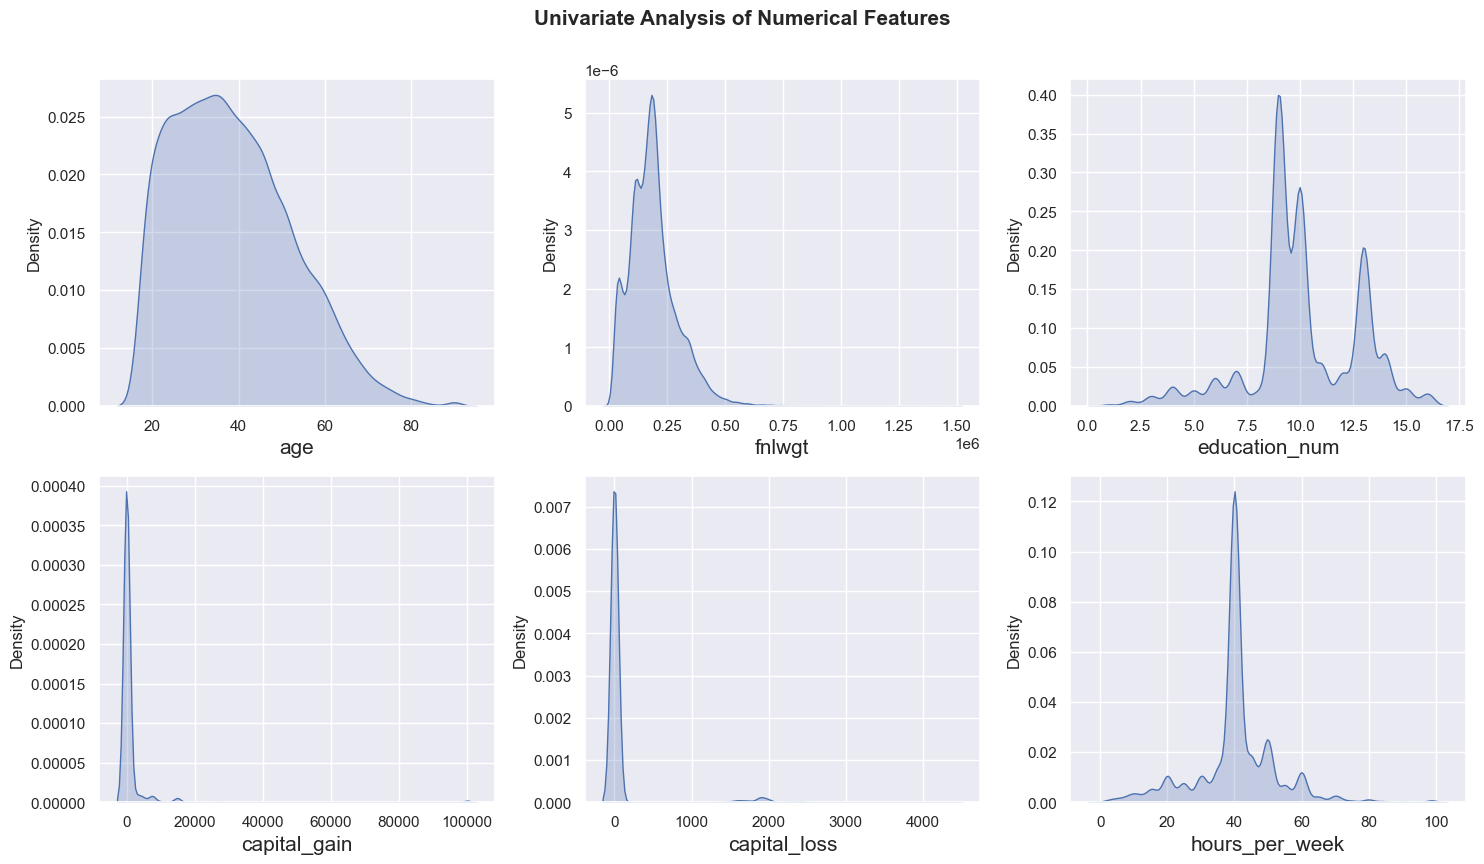

In [25]:
plt.figure(figsize=(15,20), facecolor='white')
plt.suptitle('Univariate Analysis of Numerical Features', fontweight = "bold", fontsize=15, y = 1) 

for i in range(0, len(num_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_features[i]], shade = True, color='b', data=df) 
    plt.xlabel(num_features[i], fontsize = 15)
    plt.tight_layout()

1. Age is aprroximately normally distributed.
2. Final weight,capital loss & capital gain are heavily right skewed.


### Bivariate Analysis

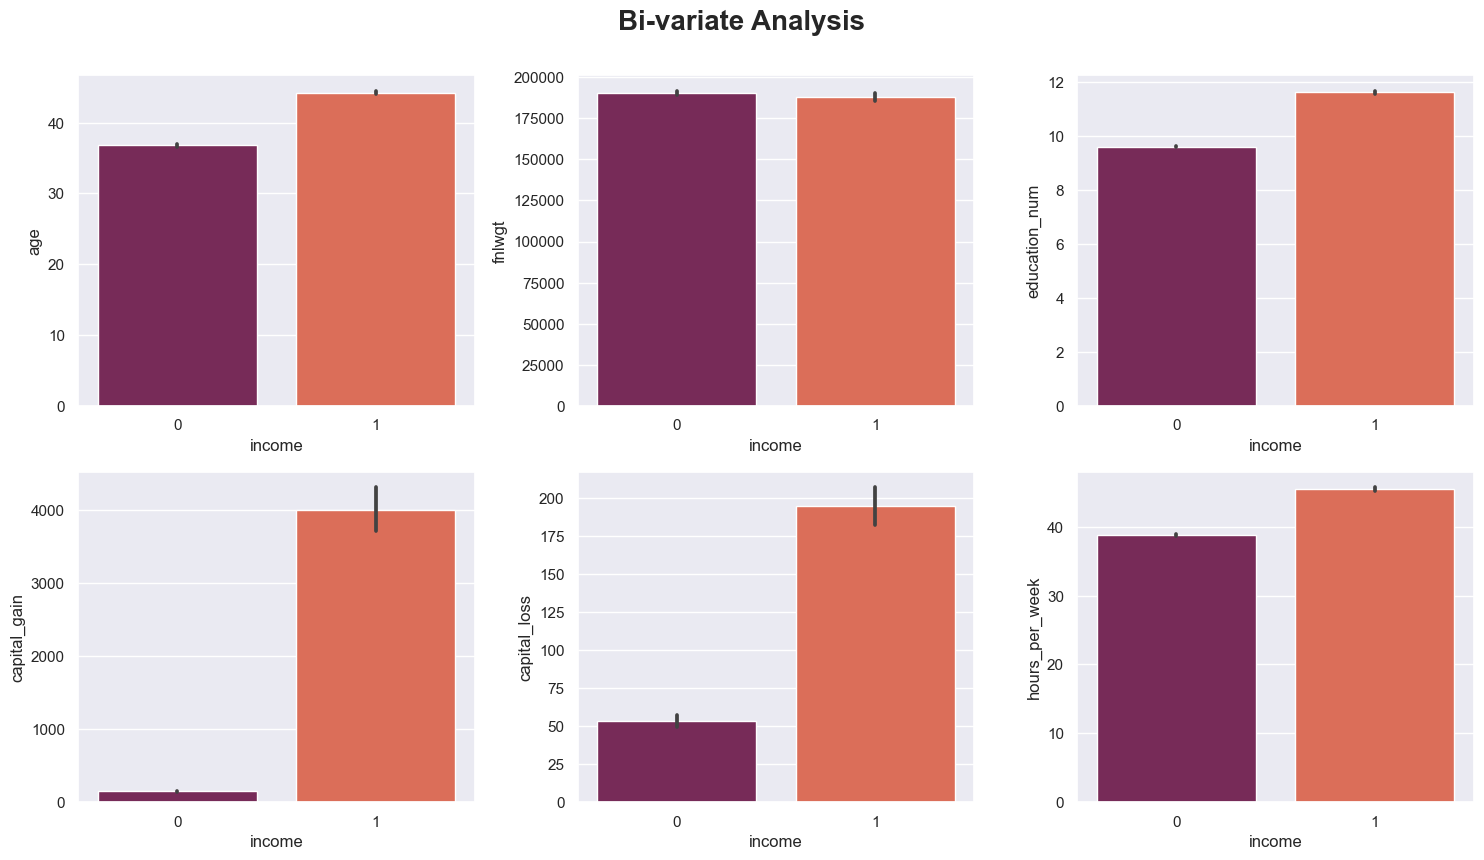

In [26]:
plt.figure(figsize=(15,20))
plt.suptitle('Bi-variate Analysis', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_features)):
    plt.subplot(5, 3, i+1) 
    sns.barplot(y=num_features[i], x='income', data = df, palette ="rocket") 
    plt.tight_layout()

### Check distribution and outliers together
- Plot 2 Graphs Together

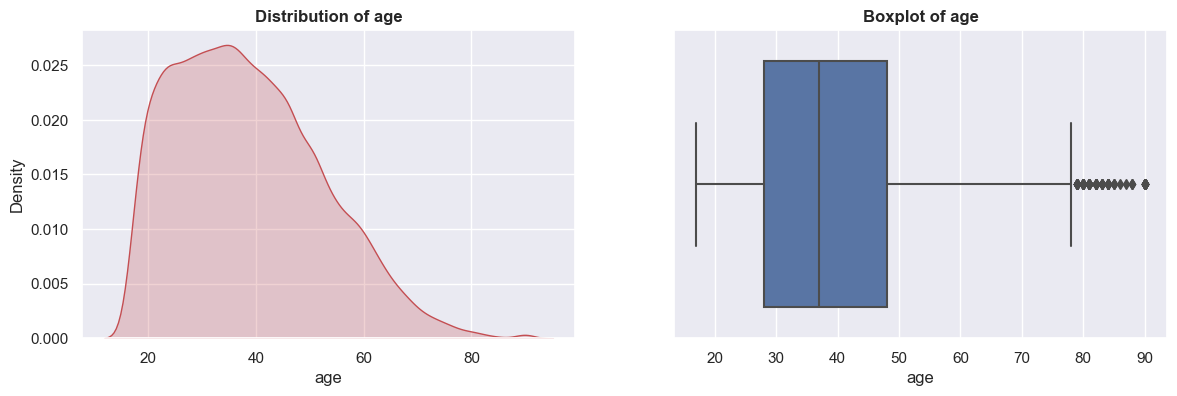

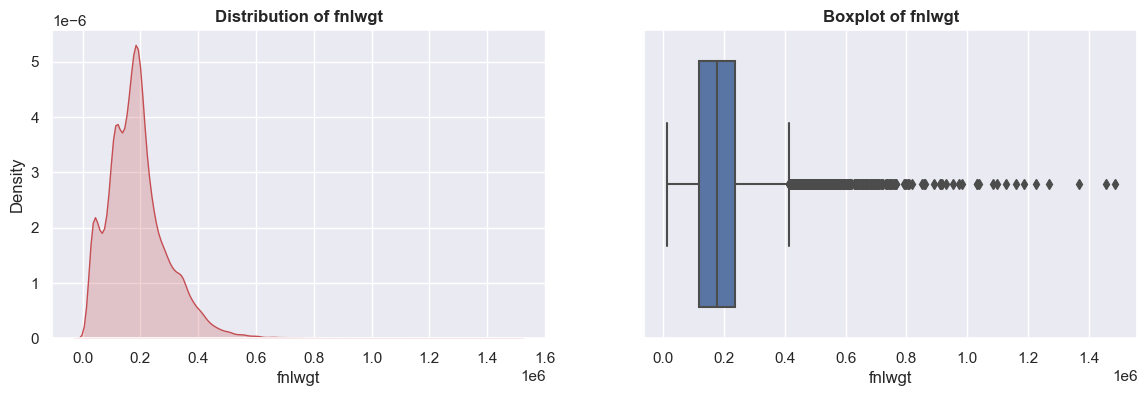

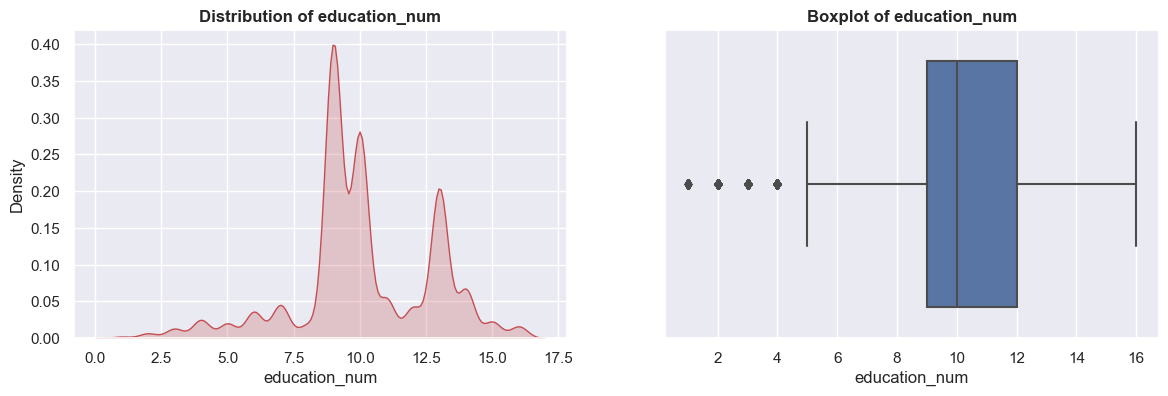

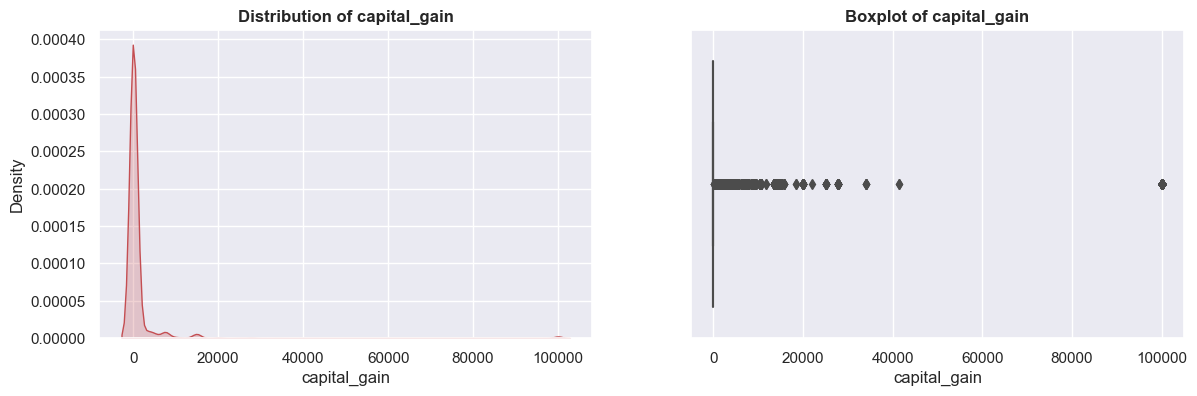

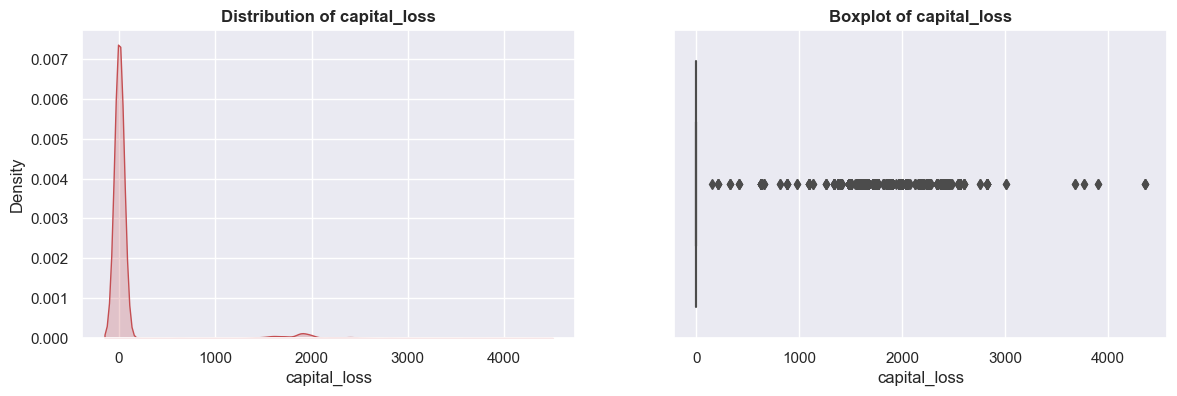

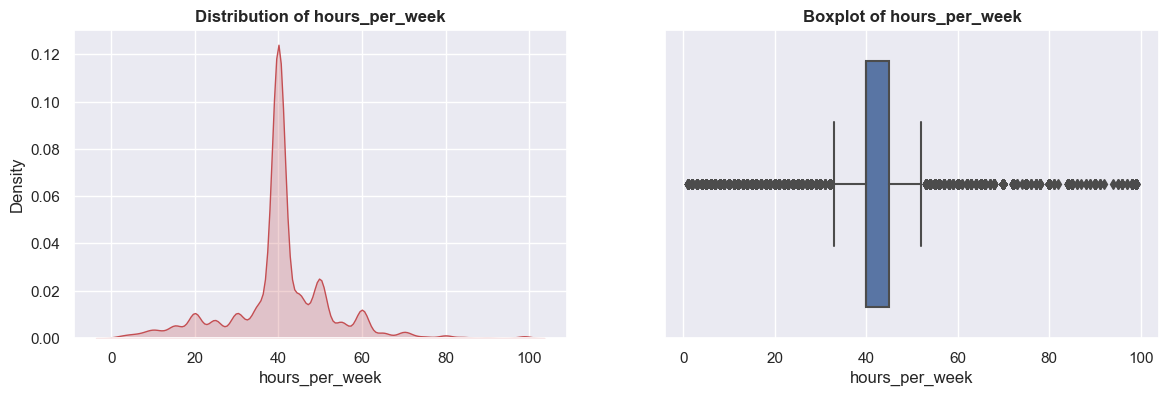

In [27]:
for feature in num_features:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.kdeplot(x=df[feature], shade = True, color='r', data=df) 
    plt.title("Distribution of {}".format(feature),fontweight = 'bold' )
    
    plt.subplot(122)
    sns.boxplot(x= feature, data = df[num_features]) 
    plt.title("Boxplot of {}".format(feature), fontweight = 'bold' )
    plt.show()

### Handling Outliers

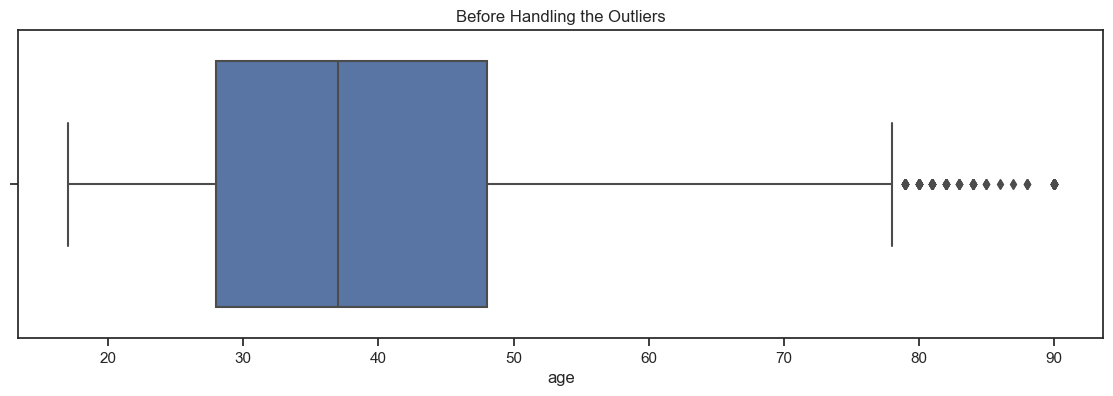

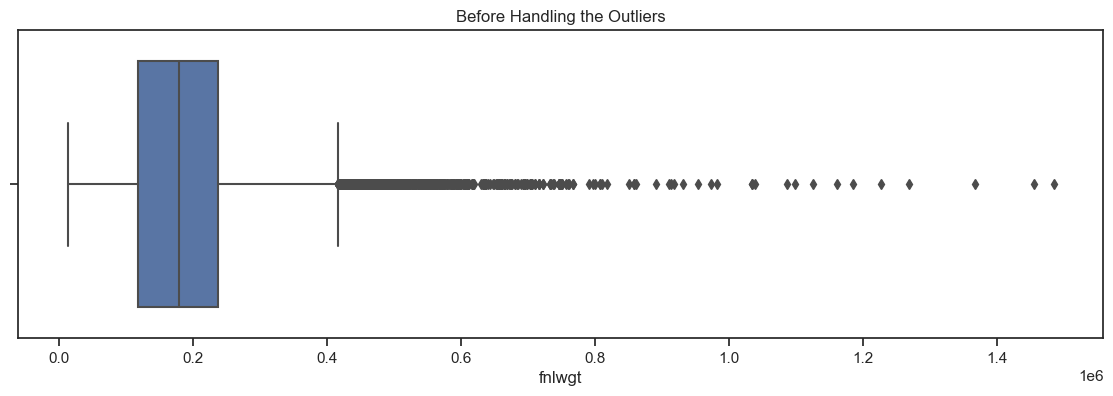

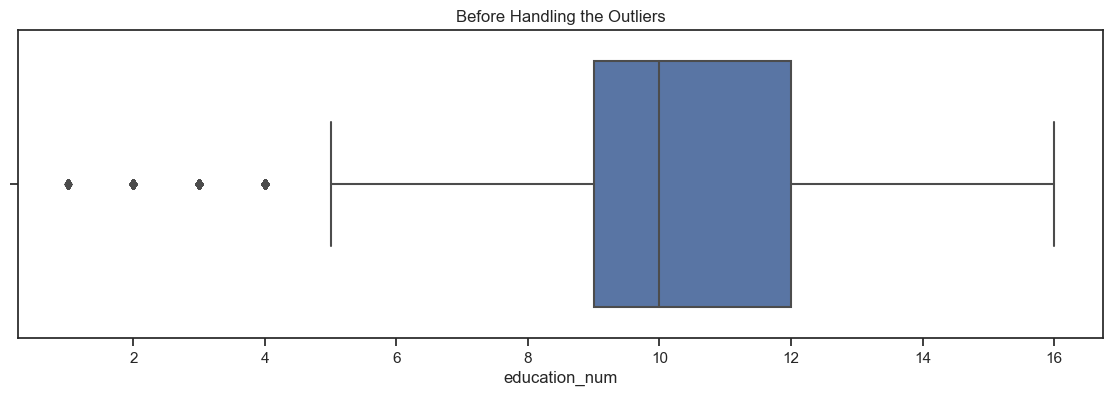

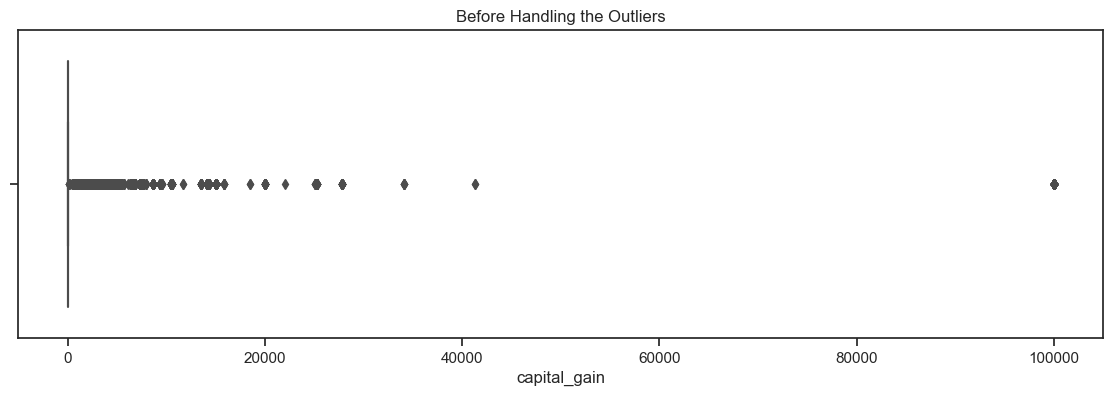

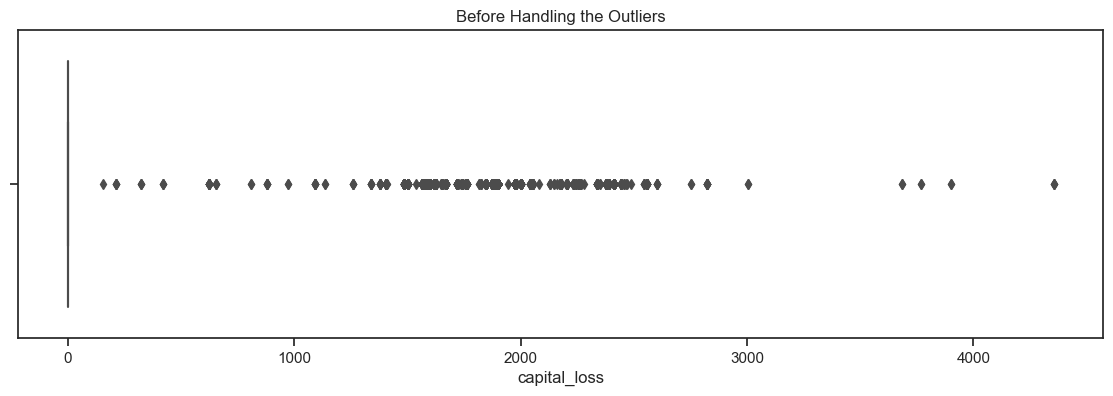

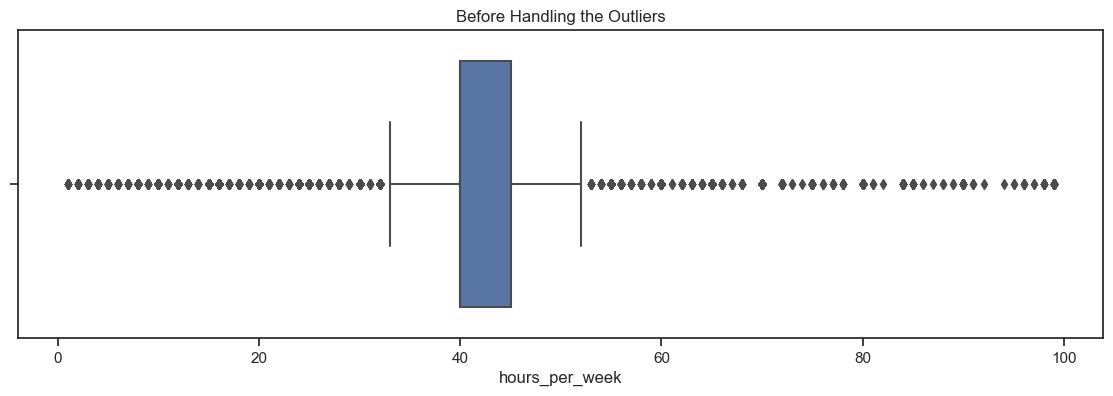

In [28]:
# before Handling the Outliers

for i in num_features:
        plt.figure(figsize=(14,4))
        sns.set_style('ticks')
        sns.boxplot(x= i, data= df)
        plt.title("Before Handling the Outliers")

In [29]:
# Handling the outliers

def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    
    print('\n -----', col, '-----')
    
    print('percentile25', percentile25)
    print('percentile75', percentile75)
    
    iqr = percentile75 - percentile25 # IQR = Q3 - Q1
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    print('Upper Limit', upper_limit)
    print('Lower Limit', lower_limit)
    
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit

    return df


In [30]:
for col in num_features:
    detect_outliers(col)


 ----- age -----
percentile25 28.0
percentile75 48.0
Upper Limit 78.0
Lower Limit -2.0

 ----- fnlwgt -----
percentile25 117828.5
percentile75 236992.75
Upper Limit 415739.125
Lower Limit -60917.875

 ----- education_num -----
percentile25 9.0
percentile75 12.0
Upper Limit 16.5
Lower Limit 4.5

 ----- capital_gain -----
percentile25 0.0
percentile75 0.0
Upper Limit 0.0
Lower Limit 0.0

 ----- capital_loss -----
percentile25 0.0
percentile75 0.0
Upper Limit 0.0
Lower Limit 0.0

 ----- hours_per_week -----
percentile25 40.0
percentile75 45.0
Upper Limit 52.5
Lower Limit 32.5


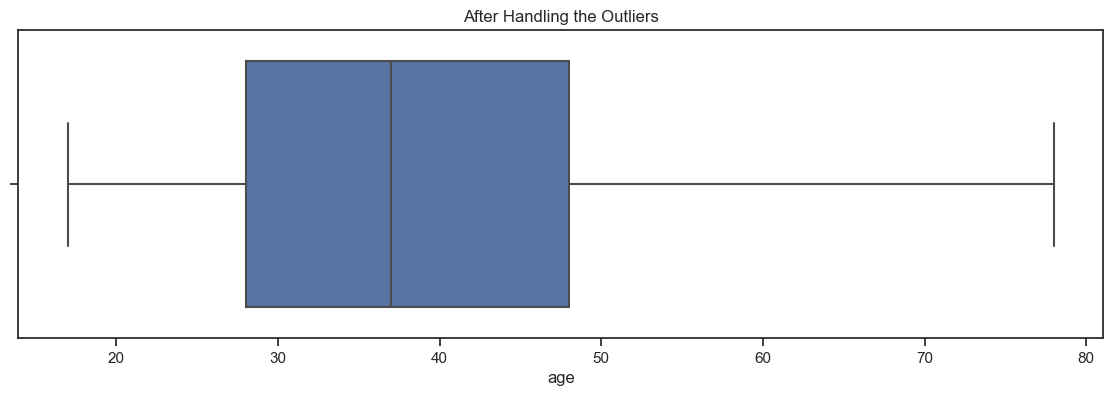

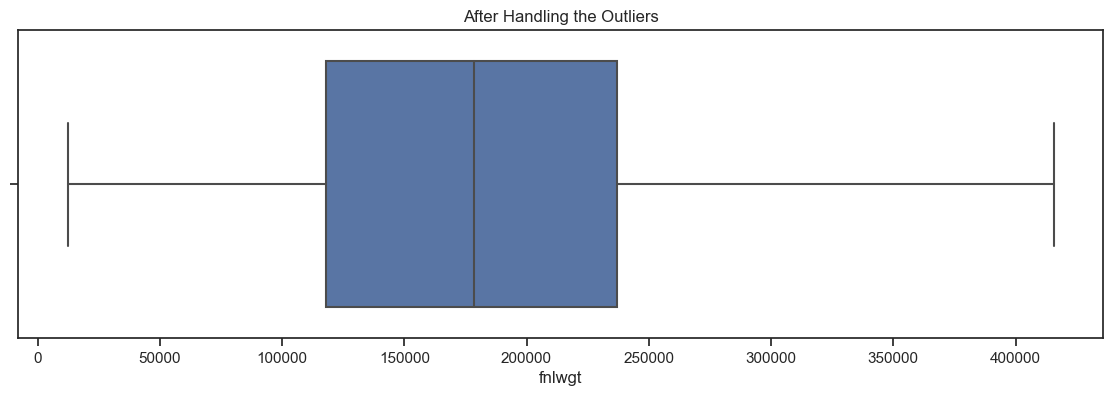

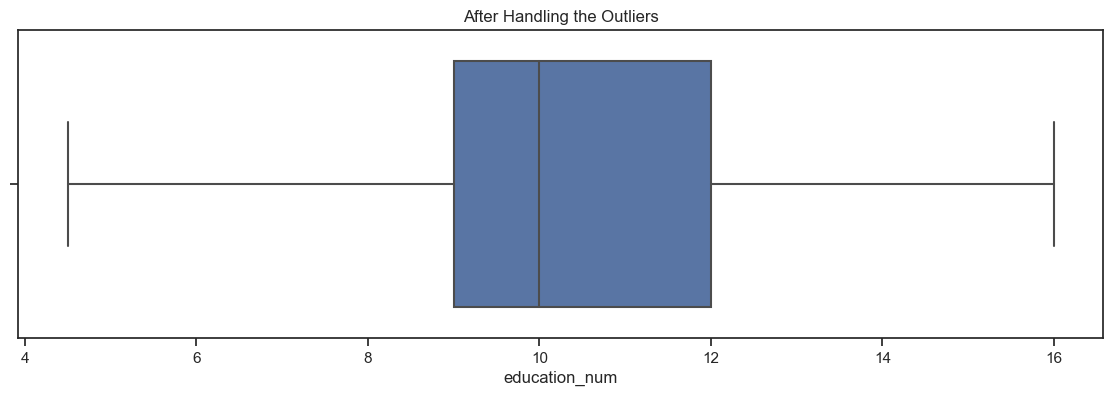

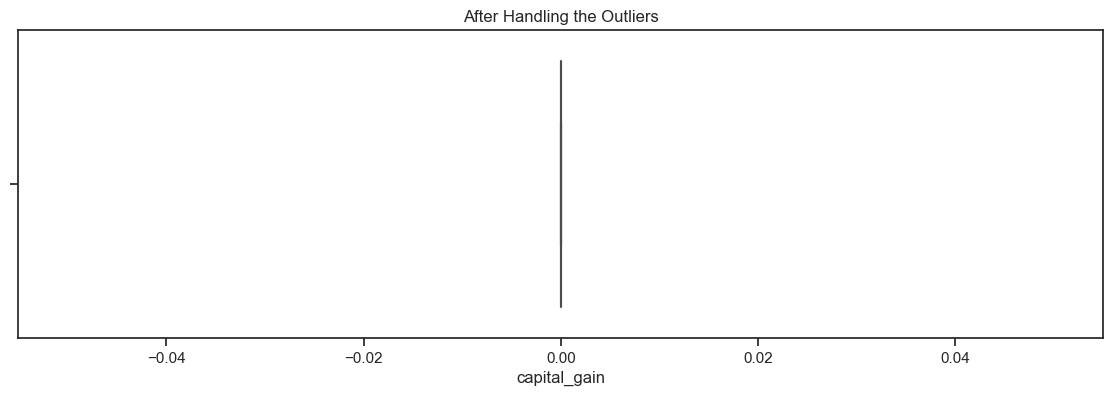

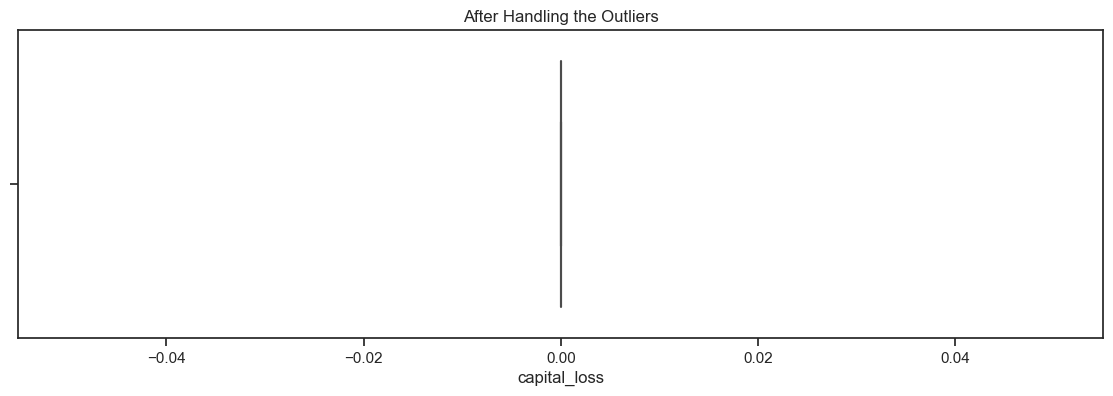

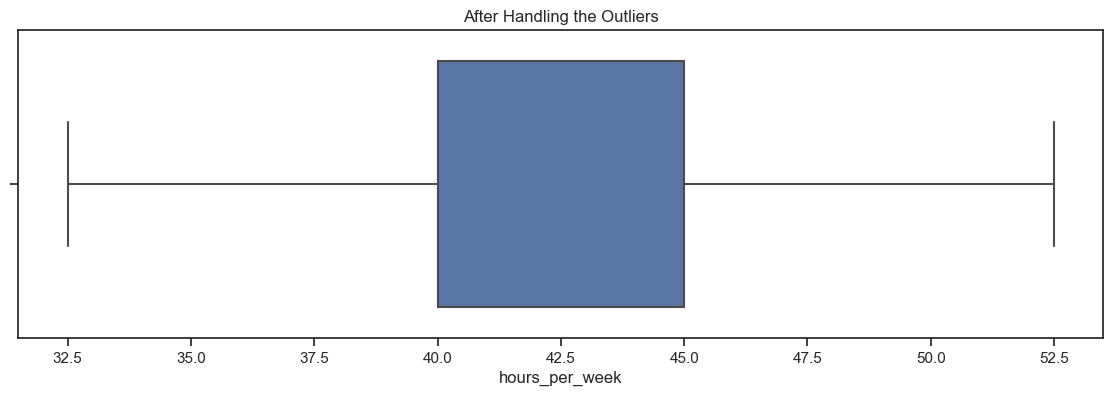

In [31]:
# After Handling the Outliers

for i in num_features:
        plt.figure(figsize=(14,4))
        sns.set_style('ticks')
        sns.boxplot(x= i, data= df)
        plt.title("After Handling the Outliers")

## Data Visualtion comapring with target feature

<Axes: xlabel='income'>

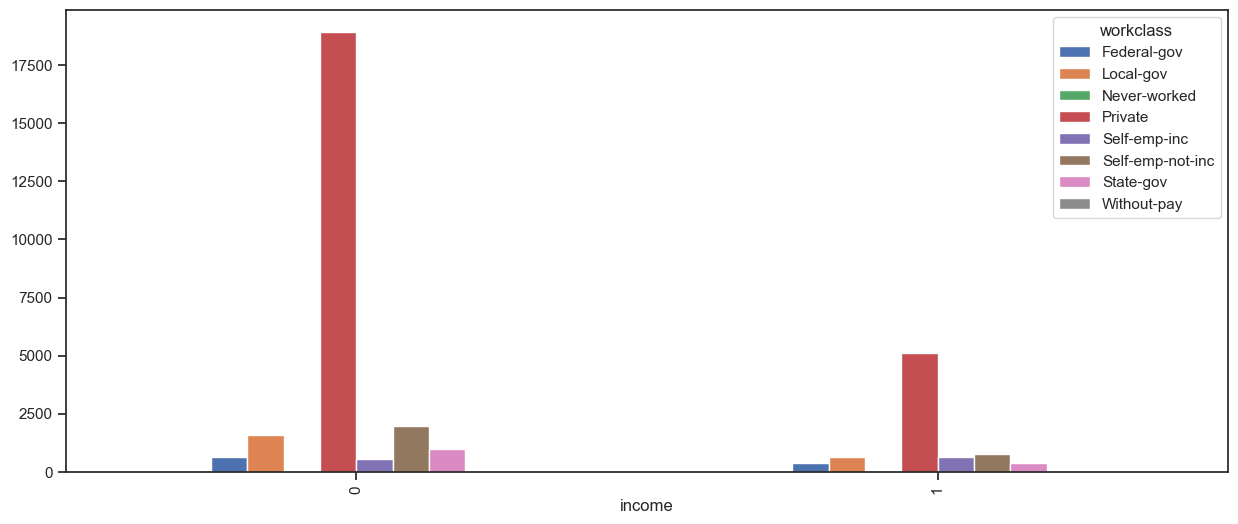

In [32]:
salary = pd.crosstab(df['income'], df['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

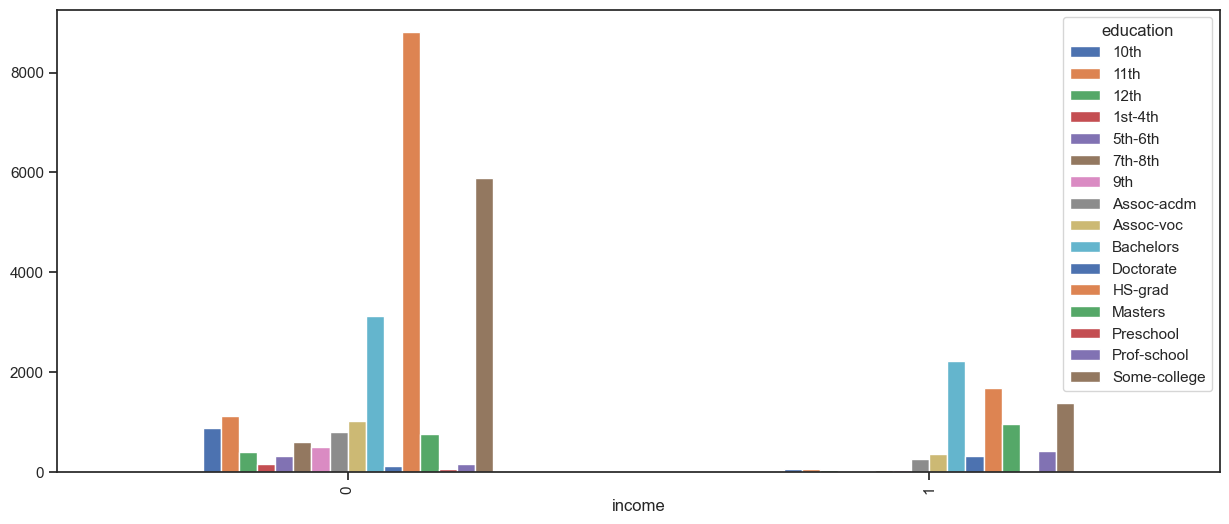

In [33]:
education = pd.crosstab(df['income'], df['education'])
education.plot(kind="bar")

<Axes: xlabel='income'>

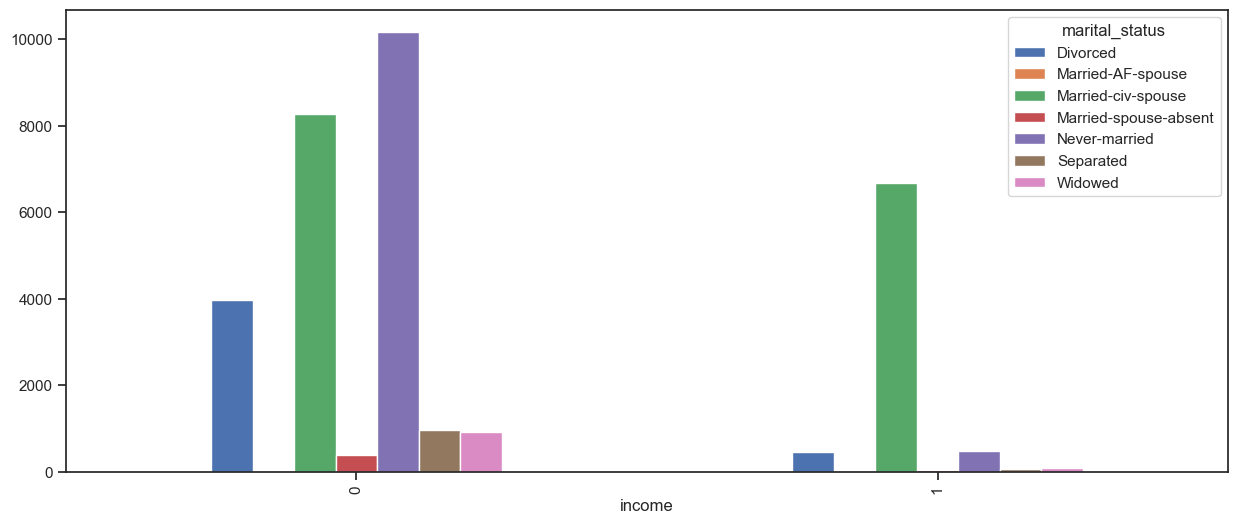

In [34]:
marital_status = pd.crosstab(df['income'],df['marital_status'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

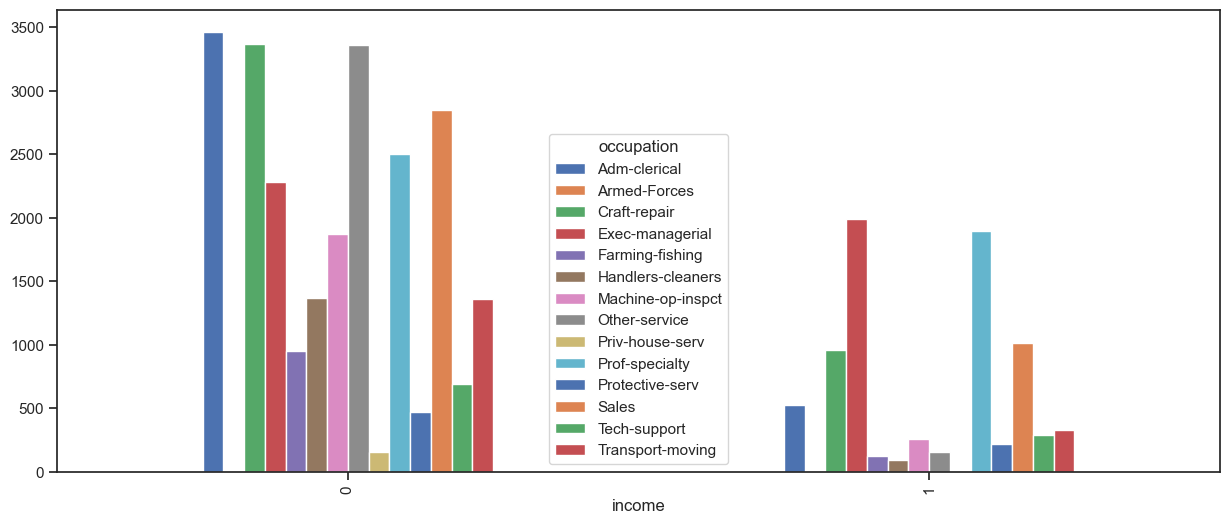

In [35]:
occupation = pd.crosstab(df['income'],df['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

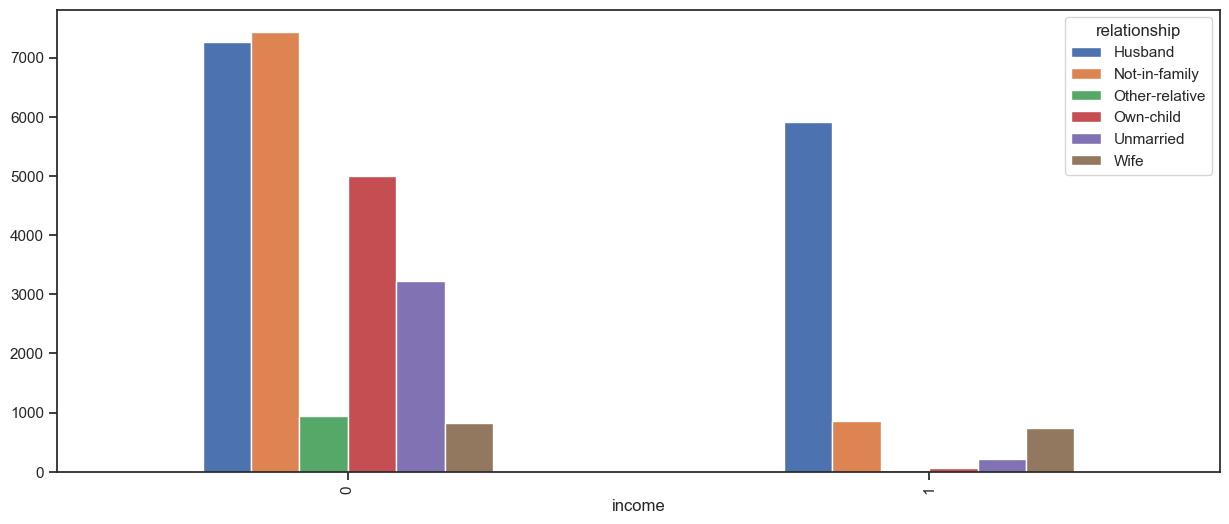

In [36]:
relationship = pd.crosstab(df['income'],df['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

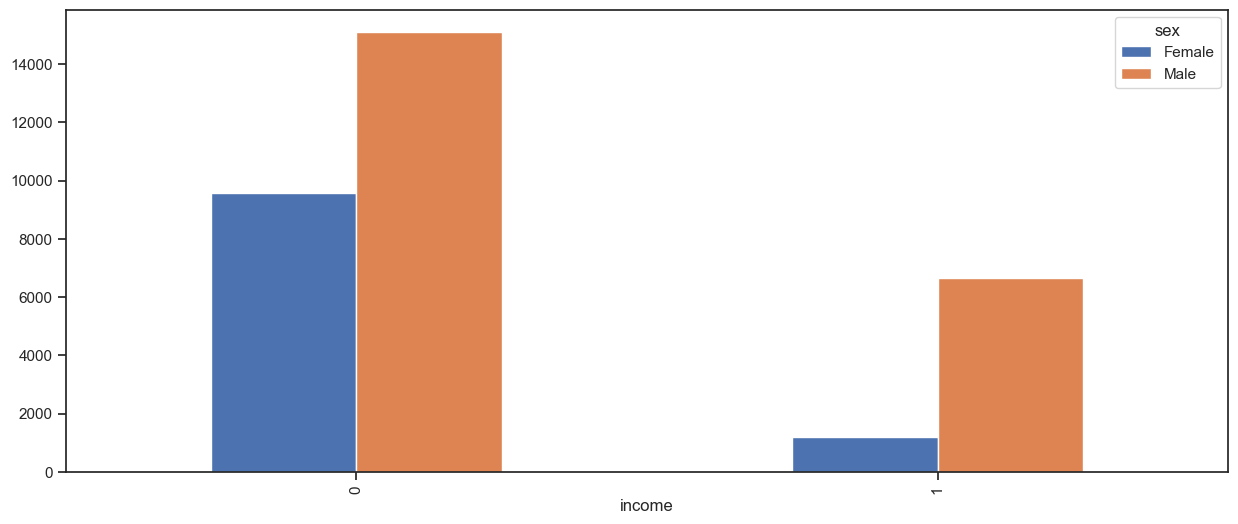

In [37]:
sex = pd.crosstab(df['income'],df['sex'])
sex.plot(kind="bar")

### Label encoding on the categorical features
- If the data of feature is continous or discrete (numbers) then we dont have to do anything and we can directly standardize and train the model
- But when the data is categorical (string) then we have to perform encoding, it means convert it to 0 or 1, then only we can train the model

In [38]:
from sklearn.preprocessing import LabelEncoder

labelencoder_x = LabelEncoder()

In [39]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,78,Private,77053.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,40.0,United-States,0
1,78,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,32.5,United-States,0
2,66,Private,186061.0,Some-college,10.0,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,0,40.0,United-States,0
3,54,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40.0,United-States,0
4,41,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,0,40.0,United-States,0


In [40]:
df[cat_features] = df[cat_features].apply(LabelEncoder().fit_transform)

In [41]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,78,3,77053.0,11,9.0,6,3,1,4,0,0,0,40.0,38,0
1,78,3,132870.0,11,9.0,6,3,1,4,0,0,0,32.5,38,0
2,66,3,186061.0,15,10.0,6,6,4,2,0,0,0,40.0,38,0
3,54,3,140359.0,5,4.5,0,6,4,4,0,0,0,40.0,38,0
4,41,3,264663.0,15,10.0,5,9,3,4,0,0,0,40.0,38,0


<Axes: >

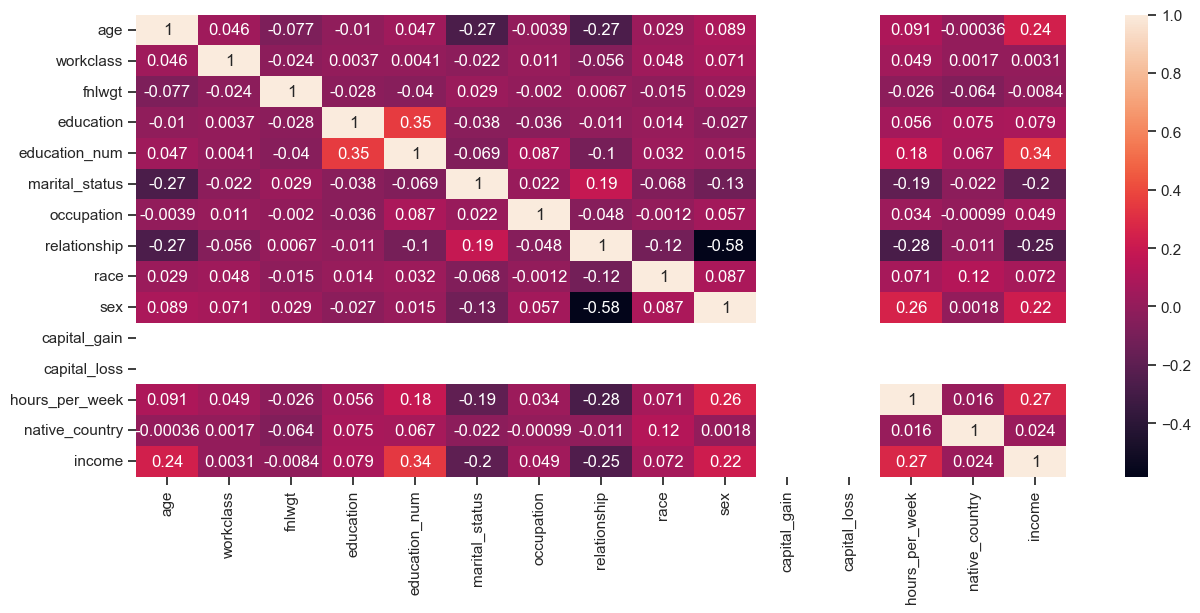

In [42]:
sns.heatmap(df.corr(),annot=True)

### Note:

* After removing Outliers in **captial_Loss** and **captial_gain** it almost showing 1 or in graph it is not visiable

In [43]:
# droping education column because we have education_num ordinal encorded one
df.drop(["education","fnlwgt", "native_country"],axis=1,inplace=True)

In [44]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,78,3,9.0,6,3,1,4,0,0,0,40.0,0
1,78,3,9.0,6,3,1,4,0,0,0,32.5,0
2,66,3,10.0,6,6,4,2,0,0,0,40.0,0
3,54,3,4.5,0,6,4,4,0,0,0,40.0,0
4,41,3,10.0,5,9,3,4,0,0,0,40.0,0


In [45]:
df.to_csv('Clean_data.csv', index= False)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [47]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

) # to standardize the data values into a standard format.

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

# apply transform to particular columns. 
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,num_features)
])


### Seperate Independent and dependent features


In [48]:
# Seperate Independent and dependent features

x = df.drop("income", axis=1)
y = df["income"]

In [49]:
num_features = [columns for columns in x.columns if x[columns].dtypes != 'O']

cat_features = [columns for columns in x.columns if x[columns].dtypes == 'O']

print(cat_features)
print(num_features)

[]
['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']


In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.35, random_state= 42)

In [51]:
X_train.shape, y_train.shape

((21149, 11), (21149,))

In [52]:
X_test.shape, y_test.shape

((11389, 11), (11389,))

## Model Training 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [54]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logisitic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train model
    
    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calcualting the accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calcualting f1 score
    model_train_precision = precision_score(y_train, y_train_pred) # Calcualting Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calcualting recall 
    
    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calcualting the accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calcualting f1 score
    model_test_precision = precision_score(y_test, y_test_pred) # Calcualting Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calcualting recall 
    
    print(list(models.keys())[i])
    
        
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    
    print('='*35)
    print('\n')
    

Random Forest
Model performance for Training set
- Accuracy: 0.9676
- F1 score: 0.9675
- Precision: 0.9402
- Recall: 0.9258
----------------------------------
Model performance for Test set
- Accuracy: 0.8177
- F1 score: 0.8139
- Precision: 0.6285
- Recall: 0.5584


Logisitic Regression
Model performance for Training set
- Accuracy: 0.8066
- F1 score: 0.7892
- Precision: 0.6673
- Recall: 0.4102
----------------------------------
Model performance for Test set
- Accuracy: 0.8082
- F1 score: 0.7899
- Precision: 0.6566
- Recall: 0.3944


Decision Tree
Model performance for Training set
- Accuracy: 0.9676
- F1 score: 0.9672
- Precision: 0.9695
- Recall: 0.8951
----------------------------------
Model performance for Test set
- Accuracy: 0.7798
- F1 score: 0.7789
- Precision: 0.5346
- Recall: 0.5223




## Hyperparamter Tuning

In [55]:
log_params = {  "penalty" : ['l1', 'l2'],
                "C" : [0.001, 0.01, 0.1, 1, 10, 100],
                "solver" : ['liblinear', 'saga']  }

df_params = {   "criterion":['gini', "entropy", "log_loss"],
                "splitter":['best', 'random'],
                "max_depth":[3, 4, 5, 6],
                "min_samples_split":[2, 3, 4, 5],
                "min_samples_leaf":[1, 2, 3],
                "max_features":["auto", "sqrt", "log2"] }

rf_params = { "max_features": [5, 7, "auto", 8],
               'n_estimators': [20, 50, 30],
               'max_depth': [10, 8, 5],
               'min_samples_split': [2, 5, 10] }

In [56]:
randomcv_models = [('Log', LogisticRegression(), log_params),
                    ('DF', DecisionTreeClassifier(), df_params),
                    ('RF', RandomForestClassifier(), rf_params)
                  ]

In [57]:
from sklearn.model_selection import GridSearchCV

model_param = {}
for name, model, params in randomcv_models:
    
    rf_random = GridSearchCV(estimator= model,
                               param_grid= params,
                               cv= 5,
                               verbose= 3,
                               n_jobs= -1,
                               scoring= 'accuracy')
    
    rf_random.fit(X_train, y_train)
    
    model_param[name] = rf_random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
---------------- Best Params for Log -------------------
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
---------------- Best Params for DF -------------------
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
---------------- Best Params for RF -------------------
{'max_depth': 10, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 50}


## Model Re-Train after Hyperparameter tuning


In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

models = {
    "Logistic Regression": LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear'),
    "DecisionTree Classifier": DecisionTreeClassifier(criterion= 'gini', max_depth= 6, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 3, splitter= 'best'),
    "RandomForest Classifier": RandomForestClassifier(max_depth= 10, max_features= 5, min_samples_split= 10, n_estimators= 50),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Again train the model
    
    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc



    print(list(models.keys())[i])
   
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8064
- F1 score: 0.7891
- Precision: 0.6661
- Recall: 0.4108
- Roc Auc Score: 0.6723
----------------------------------
Model performance for Test set
- Accuracy: 0.8058
- F1 score: 0.7883
- Precision: 0.6435
- Recall: 0.3985
- Roc Auc Score: 0.6651


DecisionTree Classifier
Model performance for Training set
- Accuracy: 0.8210
- F1 score: 0.8156
- Precision: 0.6566
- Recall: 0.5549
- Roc Auc Score: 0.7307
----------------------------------
Model performance for Test set
- Accuracy: 0.8151
- F1 score: 0.8097
- Precision: 0.6277
- Recall: 0.5335
- Roc Auc Score: 0.7178


RandomForest Classifier
Model performance for Training set
- Accuracy: 0.8604
- F1 score: 0.8550
- Precision: 0.7639
- Recall: 0.6172
- Roc Auc Score: 0.7779
----------------------------------
Model performance for Test set
- Accuracy: 0.8404
- F1 score: 0.8341
- Precision: 0.7013
- Recall: 0.5647
- Roc Auc Score: 0.7452




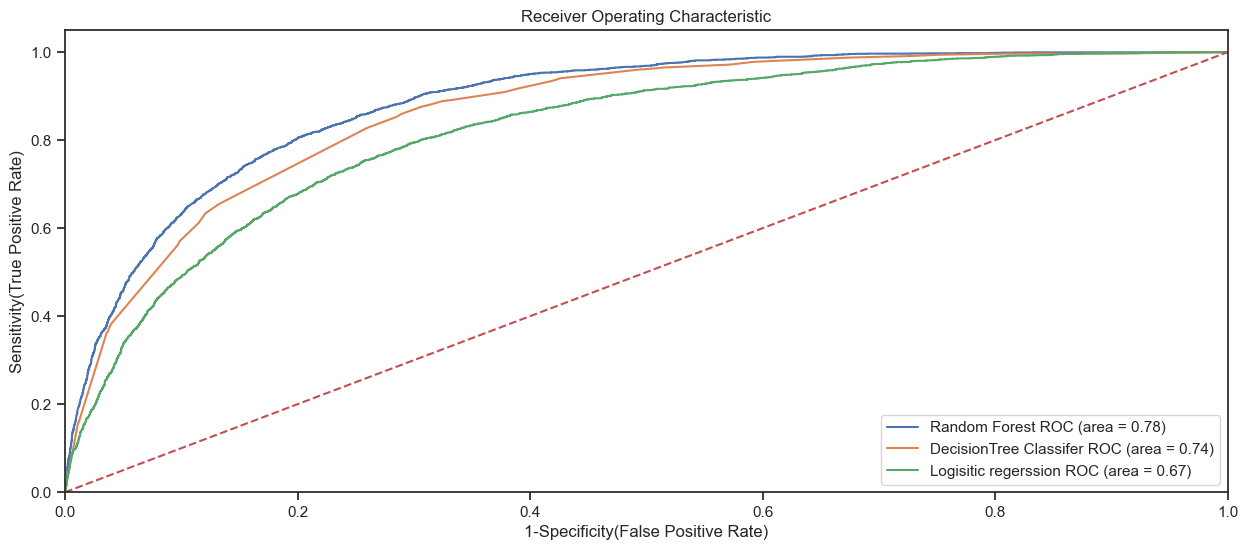

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_model = [
    {
        'label' : 'Random Forest',
        'model' : RandomForestClassifier(max_depth= 10, max_features= 5, min_samples_split= 5, n_estimators= 30),
        'auc'   : 0.7820
    },
    {
        'label' : 'DecisionTree Classifer',
        'model' : DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 5, splitter= 'best'),
        'auc'   : 0.7420
    },
    {
       'label' : 'Logisitic regerssion',
       'model' :  LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear'),
        'auc'  : 0.6723
    }
]

# Below for loop iterates through your model list

for m in auc_model:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train your model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], m['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('auc.png')
plt.show()   # Display

## Feature Selection for Model deployment

In [60]:
best_rf = RandomForestClassifier(max_depth= 10, max_features= 5, min_samples_split= 5, n_estimators= 30)
best_rf = best_rf.fit(X_train,y_train)
rf_pred = best_rf.predict(X_test)
score = accuracy_score(y_test, rf_pred)
cr = classification_report(y_test, rf_pred)

print("FINAL RF")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL RF
Accuracy Score value: 0.8403
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8699
           1       0.70      0.57      0.63      2690

    accuracy                           0.84     11389
   macro avg       0.79      0.75      0.76     11389
weighted avg       0.83      0.84      0.83     11389



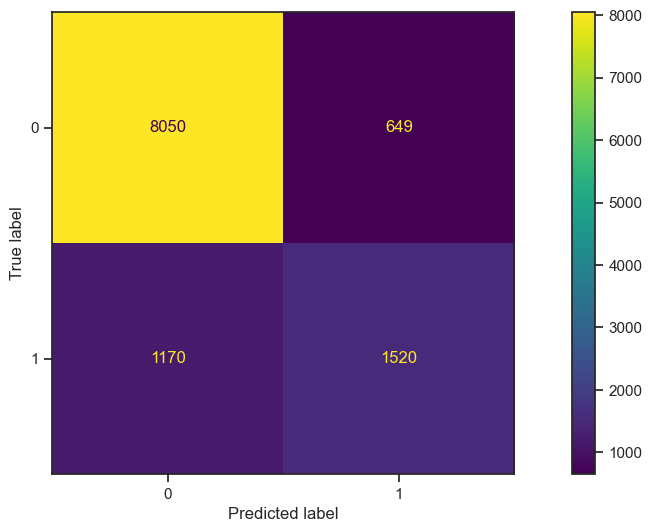

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)

### Store the best model as pickel file

In [62]:
import pickle
pickle.dump(best_rf, open('randomforest_hupertuned.sav','wb'))